<a href="https://colab.research.google.com/github/aecrofton/MPM_200_Crofton/blob/main/MPM200_Session5_HW_ACrofton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [ ]:
install.packages("beepr")
system("sudo apt-get install -y portaudio19-dev", intern=TRUE)
install.packages("audio")
library(beepr)
library(audio)
beep(sound = "mario")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "portaudio19-dev is already the newest version (19.6.0-1.1)."    
[5] "0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded."

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): cannot open audio for playback: Device unavailable

”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [ ]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("sjPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [ ]:
#read the csv file and
data_humm = read.csv("/content/sample_data/Hummingbird_data.csv")

In [ ]:
colnames(data_humm)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [ ]:
## your code answer here
nrow(data_humm)
ncol(data_humm)

[1] 6908

[1] 12

In [ ]:
# 6908 rows and 12 columns

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [ ]:
str(data_humm)

'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [ ]:
# Identify data types of each column
data_types = sapply(data_humm, class)
print (data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [ ]:
library(dplyr)
model_data = sample_n(data_humm, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [ ]:
nrow(model_data)
ncol(model_data)

[1] 5000

[1] 12

In [ ]:
# 5000 rows and 12 columns

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [ ]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : chr  "2/25/2015" "5/28/2014" "3/15/2014" "3/14/2013" ...
 $ Disposition_binary: chr  "Died" "Released" "Released" "Released" ...
 $ Place             : chr  "malibu" "malibu" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "No" "Yes" "Yes" ...
 $ Species_e         : chr  "Selasphorus" "Non-selasphorus" "ANHU" "Non-selasphorus" ...
 $ Sex_e             : chr  "Female-like " "unknown" "Male" "unknown" ...
 $ Age_e             : chr  "adult-like" "Nestling" "adult-like" "Nestling" ...
 $ Brought_in_after  : int  1 0 3 1 0 0 0 1 0 0 ...
 $ season            : chr  "Winter" "Spring" "Spring" "Spring" ...
 $ r                 : chr  "unknown" "unknown" "nest-related" "found on the ground" ...
 $ Green_Orange      : chr  "Selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "6361_ALHU" "6243_ANHU" "4903_ANHU" "4640_ANHU" ...


In [ ]:
data_types = sapply(model_data, class)
print (data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


In [ ]:
# 11 categorical variables and 1 continuous variable

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [ ]:
write.csv(model_data, "Hummingbird_data_CROFTON_AMANDA.csv", row.names = FALSE)

In [ ]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [ ]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4135
Santa Barbara,70
malibu,795


In [ ]:
rehab = model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [ ]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

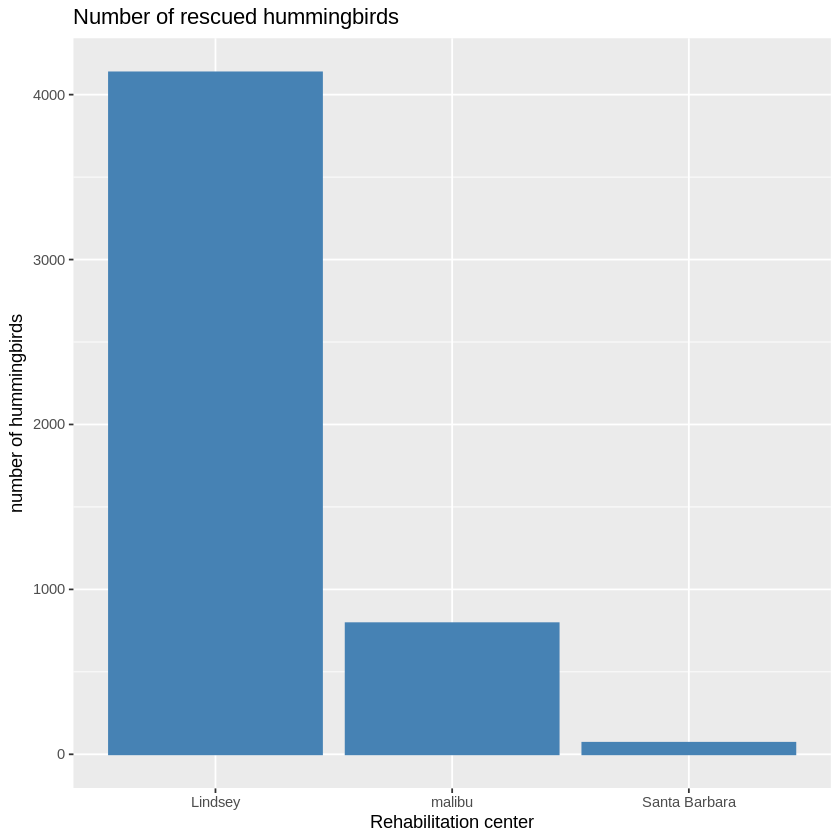

In [ ]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [ ]:
library(ggplot2)

In [ ]:
ggsave("humm_rehab_plot_CROFTON_AMANDA.pdf", plot = p, width = 4, height = 3)

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

In [ ]:
# model_data%>%
# This line of code tells R to take the model_data data set and send it to the next function, using the pipe operator.
# group_by(Place)%>%
# This line of code tells R to group the data according to the column "Place" and then send it to the next function, using the pipe operator.
# summarise(count = n_distinct(ID))
# This line of code creates a new data frame with summary statistics, including a new summary column, "count."

# rehab = model_data  %>%
# This line of code assigns the model_data to a new object named "rehab" and tells R to take the model_data data set and send it to the next function, using the pipe operator.
# group_by(Place)%>%
# This line of code tells R to group the data according to the column "Place" and then send it to the next function, using the pipe operator.
# summarise(count = n_distinct(ID))
# This line of code creates a new data frame with summary statistics, including a new summary column, "count."

# p = ggplot(rehab, aes(x = Place, y = count)) +
# This line of code creates a plot with "rehab" as the data frame, "Place" on the x-axis, and "count" on the y-axis.
# geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
# This line of code tells R to take the column "count" and plot bar heights as "count" in the color steel blue. The "+" indicates that another layer will follow.
# xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
# This line adds x- and y-axis labels ("Rehabilitation center" and "number of hummingbirds," respectively) to the plot. The "+" indicates that another layer will follow.
# labs(title = "Number of rescued hummingbirds")
# This line adds a title ("Number of rescued hummingbirds") to the plot.

# library(ggplot2)
# This loads an installed package (ggplot2) into the current R session.
# ggsave("humm_rehab_plot_CROFTON_AMANDA.pdf", plot = p, width = 4, height = 3)
# This line of code saves the plot as a PDF file with a width of 4 inches, a height of 3 inches, and a title of "humm_rehab_plot_CROFTON_AMANDA.pdf."

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [ ]:
# 5 covariates that may affect survival: Species_e, Age_e, season, r, F_Aid

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,Species_e,count
<chr>,<chr>,<int>
Died,ANHU,2310
Died,BCHU,19
Died,Non-selasphorus,335
Died,Selasphorus,557
Released,ANHU,839
Released,BCHU,17
Released,Non-selasphorus,609
Released,Selasphorus,314


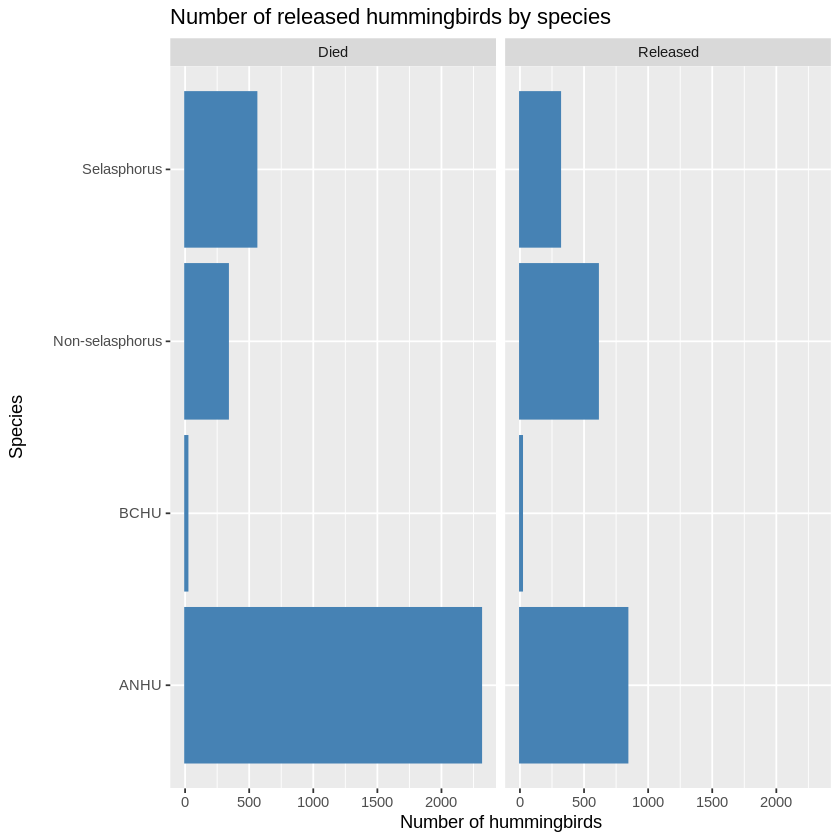

In [ ]:
df = model_data  %>%
group_by(Disposition_binary, Species_e)%>%
summarise(count = n_distinct(ID))
df
p = ggplot(df, aes(x = Species_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Species')+ ylab('Number of hummingbirds')+
labs(title = "Number of released hummingbirds by species")
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,Age_e,count
<chr>,<chr>,<int>
Died,Nestling,412
Died,adult-like,2809
Released,Nestling,756
Released,adult-like,1023


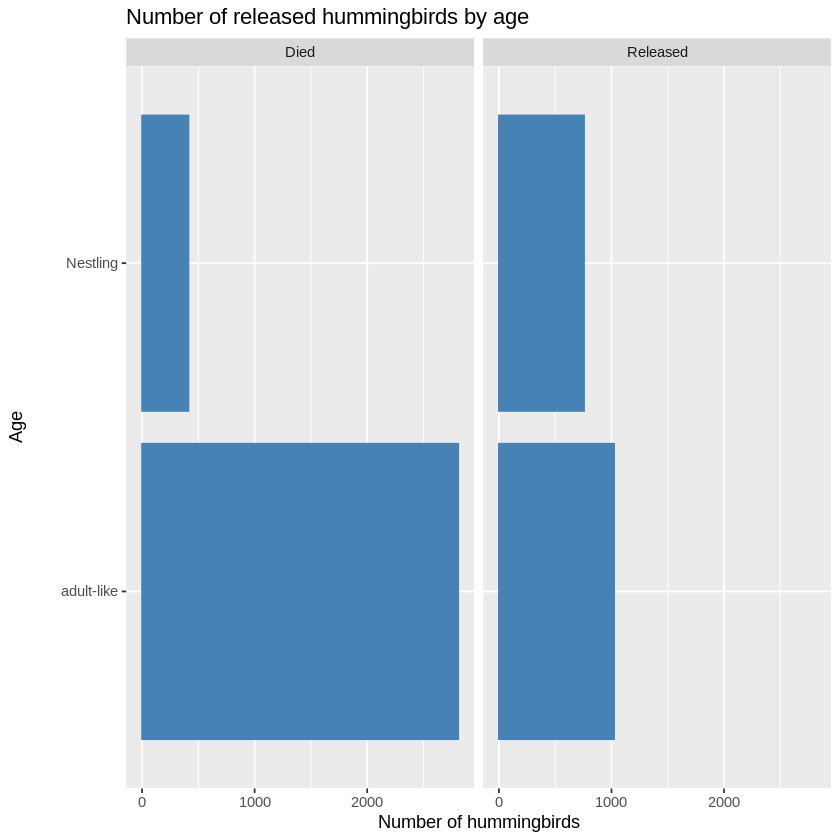

In [ ]:
df = model_data  %>%
group_by(Disposition_binary, Age_e)%>%
summarise(count = n_distinct(ID))
df
p = ggplot(df, aes(x = Age_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Age')+ ylab('Number of hummingbirds')+
labs(title = "Number of released hummingbirds by age")
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,season,count
<chr>,<chr>,<int>
Died,Fall,392
Died,Spring,1329
Died,Summer,943
Died,Winter,557
Released,Fall,58
Released,Spring,936
Released,Summer,584
Released,Winter,201


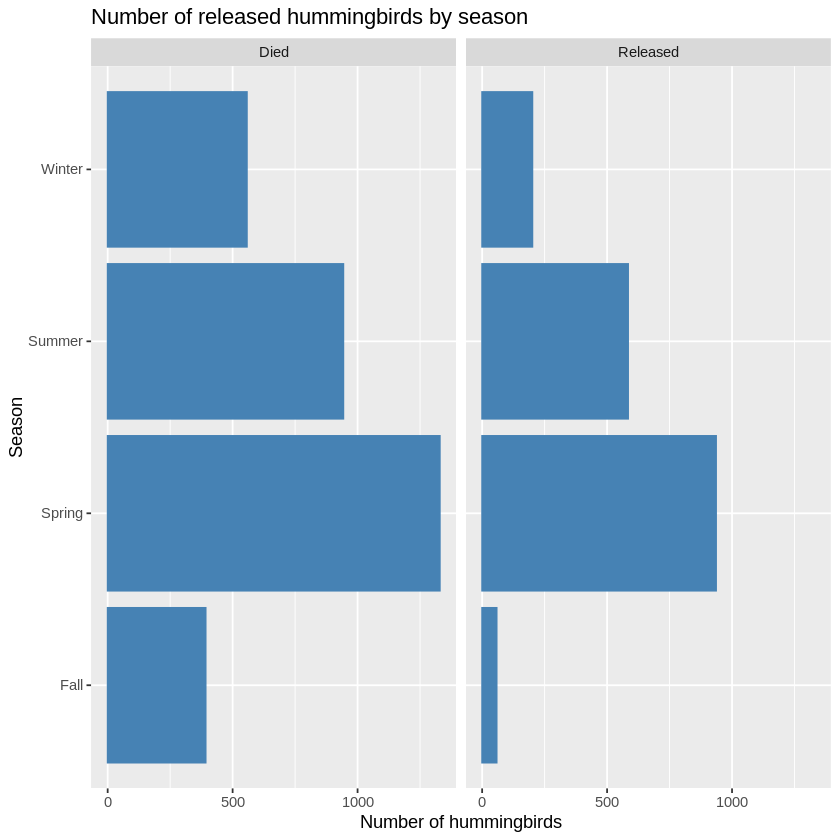

In [ ]:
df = model_data  %>%
group_by(Disposition_binary, season)%>%
summarise(count = n_distinct(ID))
df
p = ggplot(df, aes(x = season, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Season')+ ylab('Number of hummingbirds')+
labs(title = "Number of released hummingbirds by season")
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,r,count
<chr>,<chr>,<int>
Died,caught by domestic animal,482
Died,found inside,122
Died,found on the ground,1399
Died,nest-related,267
Died,suspect torpor-like state,95
Died,unknown,497
Died,window hit,359
Released,caught by domestic animal,182
Released,found inside,45


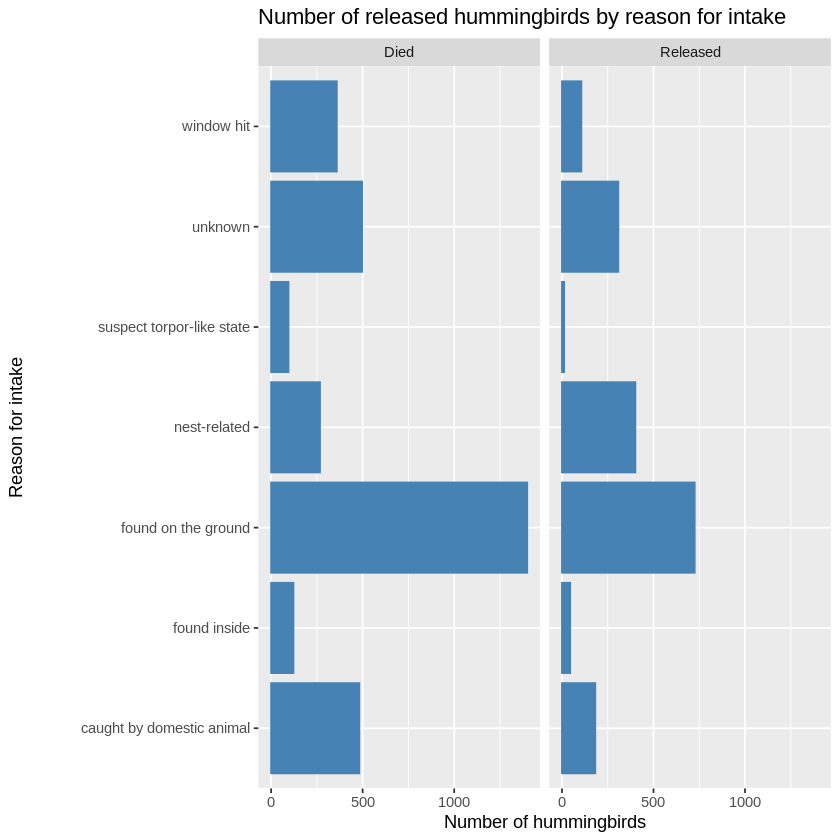

In [ ]:
df = model_data  %>%
group_by(Disposition_binary, r)%>%
summarise(count = n_distinct(ID))
df
p = ggplot(df, aes(x = r, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Reason for intake')+ ylab('Number of hummingbirds')+
labs(title = "Number of released hummingbirds by reason for intake")
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,F_Aid,count
<chr>,<chr>,<int>
Died,No,2092
Died,Yes,1129
Released,No,1193
Released,Yes,586


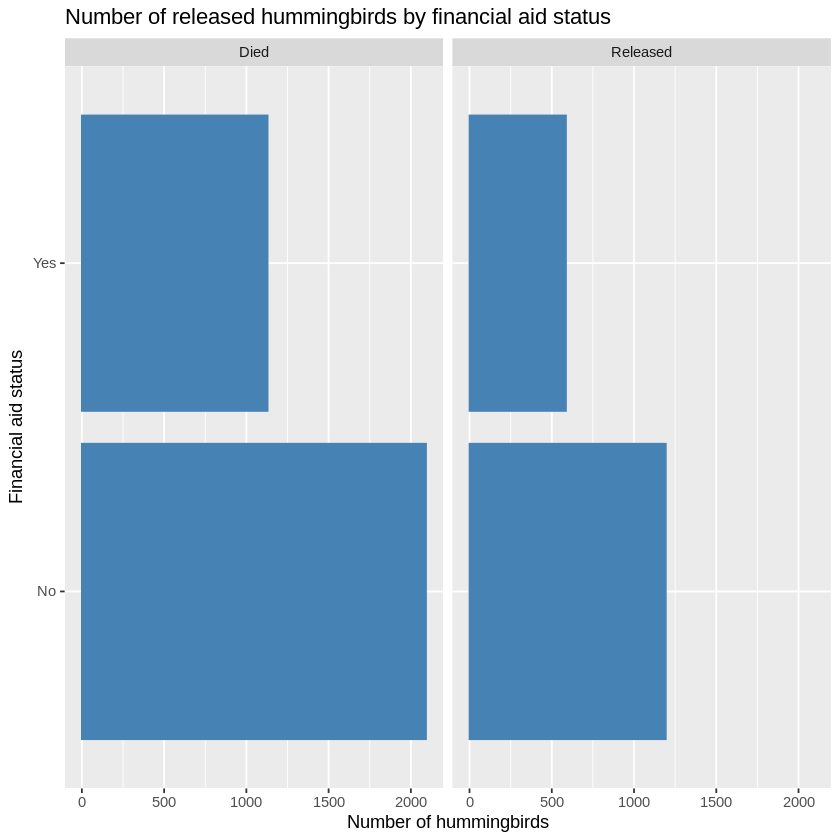

In [ ]:
df = model_data  %>%
group_by(Disposition_binary, F_Aid)%>%
summarise(count = n_distinct(ID))
df
p = ggplot(df, aes(x = F_Aid, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Financial aid status')+ ylab('Number of hummingbirds')+
labs(title = "Number of released hummingbirds by financial aid status")
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

In [ ]:
# My observations are that Species_e, Age_e, season, r, and F_Aid do in fact appear to impact survival (and subsequent release) of birds admitted to the rehabilitation center.
# Based on the tables and plots alone, it is difficult to tell whether these impacts are statistically significant.
# Possible statistical tests could include a chi-square test of independence or a logistic regression (for a more detailed model).

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

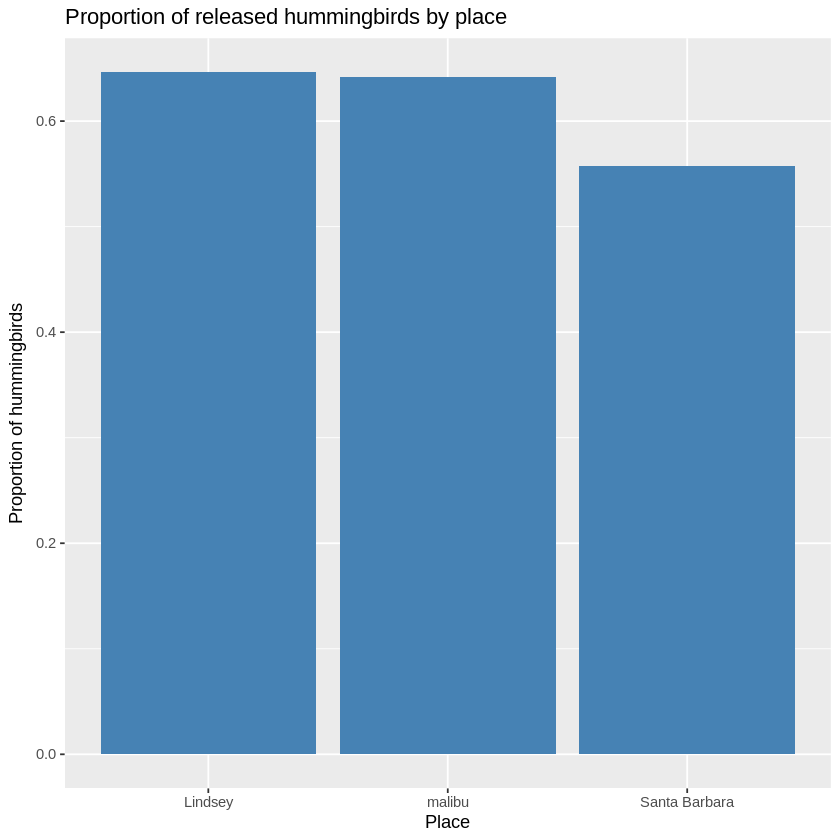

In [ ]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n(), .groups = "drop_last") %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion)) +
  geom_bar(stat = "identity", position = "dodge", fill = "steelblue") +
  xlab('Place') +
  ylab('Proportion of hummingbirds') +
  labs(title = "Proportion of released hummingbirds by place")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

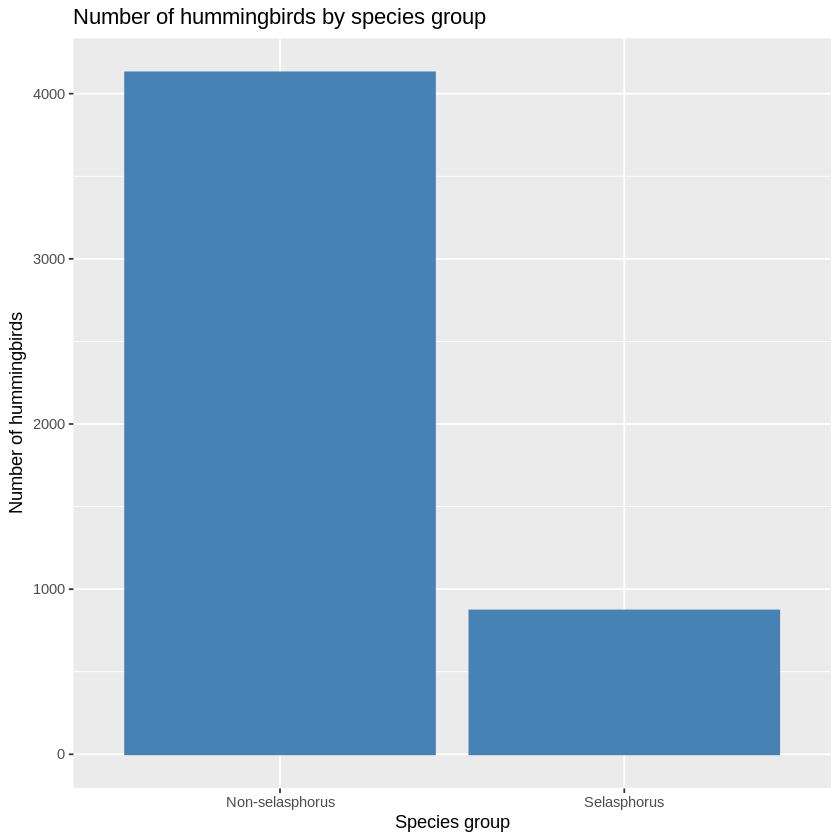

In [ ]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(
  model_data$Species_e == "Selasphorus", "Selasphorus", "Non-selasphorus")

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group) %>%
  summarise(count = n_distinct(ID))

ggplot(species_distribution, aes(x = Species_group, y = count, fill = 'Species_group')) +
  geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
  xlab('Species group')+ ylab('Number of hummingbirds')+
  labs(title = "Number of hummingbirds by species group")

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,Species_group,count
<chr>,<chr>,<int>
Died,Non-selasphorus,2664
Died,Selasphorus,557
Released,Non-selasphorus,1465
Released,Selasphorus,314


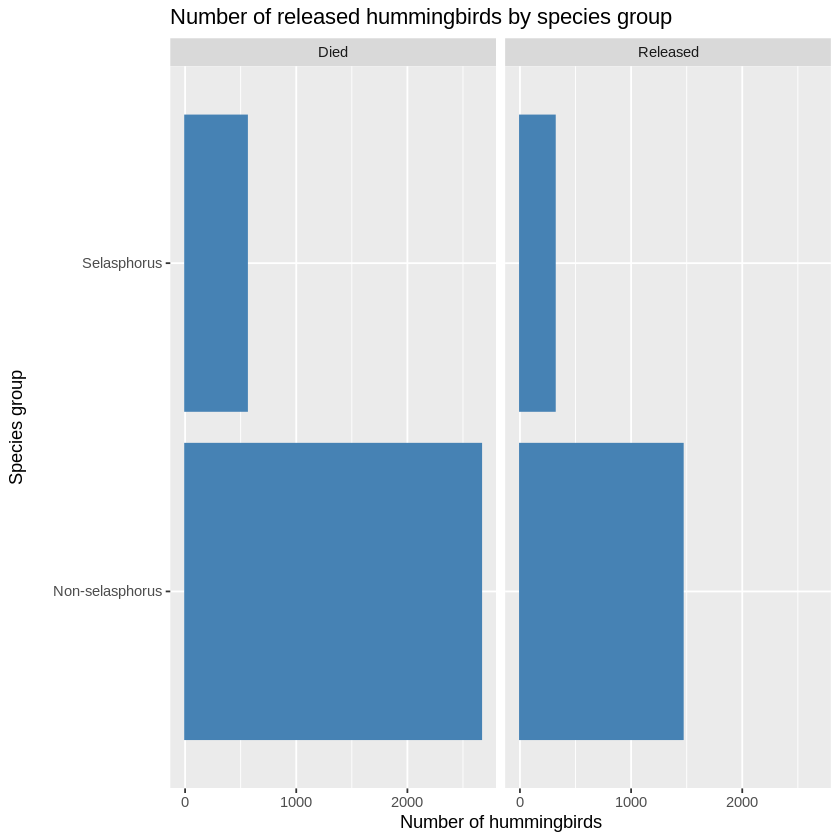

In [ ]:
df = model_data  %>%
group_by(Disposition_binary, Species_group)%>%
summarise(count = n_distinct(ID))
df
p = ggplot(df, aes(x = Species_group, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Species group')+ ylab('Number of hummingbirds')+
labs(title = "Number of released hummingbirds by species group")
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

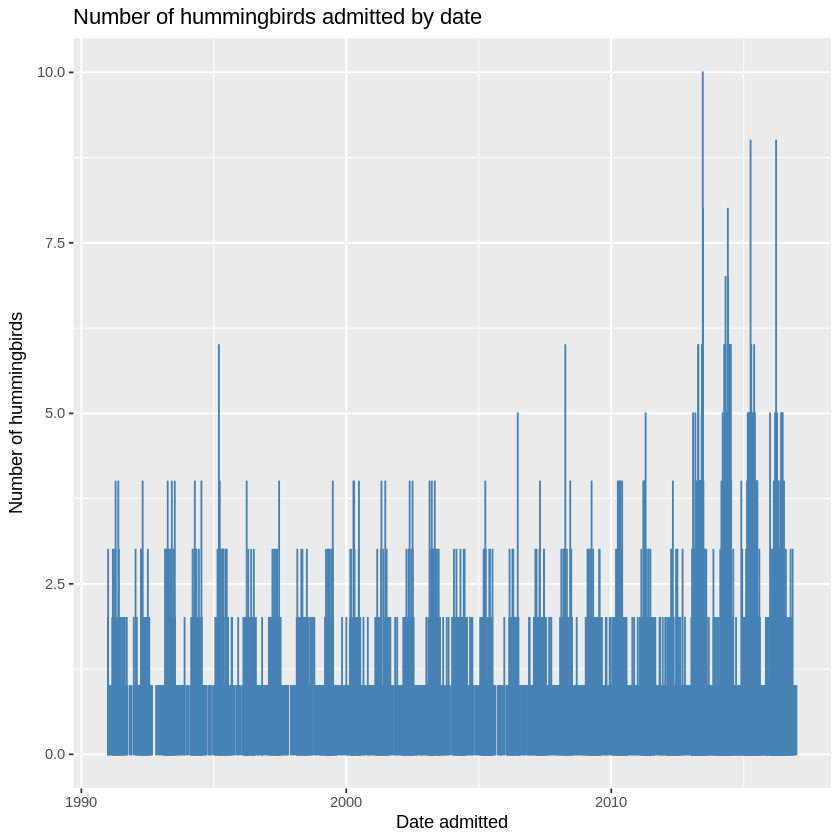

In [ ]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")
admissions_by_date = model_data %>%
group_by(Admitted_date) %>%
summarise(count = n_distinct(ID))
ggplot(admissions_by_date, aes(x = Admitted_date, y = count)) +
  geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
  xlab('Date admitted')+ ylab('Number of hummingbirds')+
  labs(title = "Number of hummingbirds admitted by date")

Q12a Please explain the argument `format` in code above

In [ ]:
# The argument "format" is used to tell R how to display dates or strings.

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [ ]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

Finally, we can use `ggplot` to plot these timelines.

Admitted_month,count
<chr>,<int>
1991-01,14
1991-02,2
1991-03,24
1991-04,28
1991-05,18
1991-06,18
1991-07,13
1991-08,11
1991-09,7


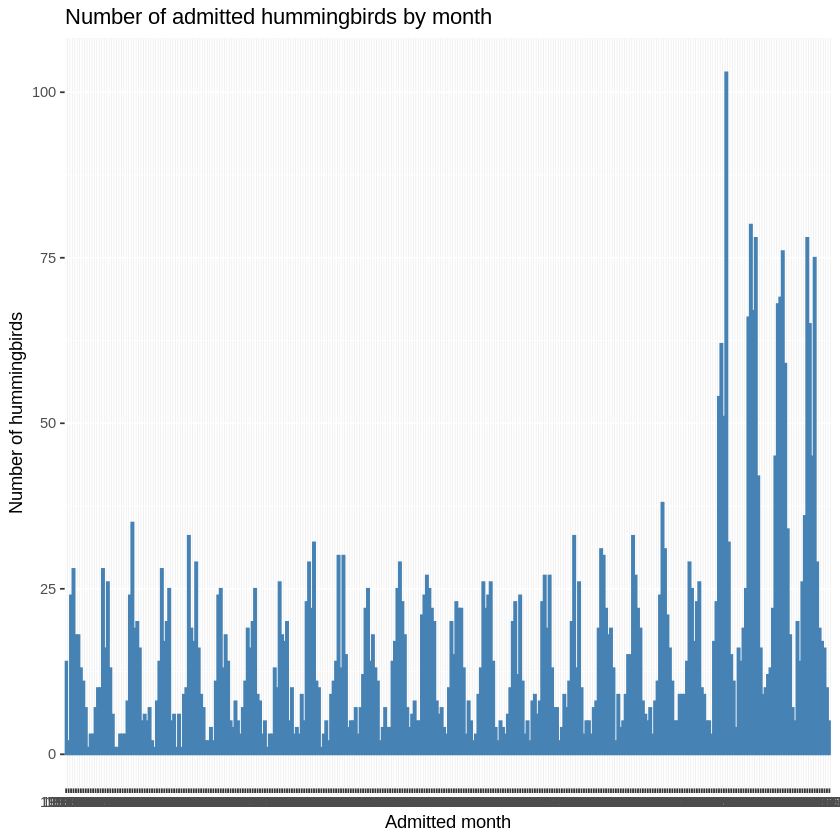

In [ ]:
# Plot admissions by month
admissions_by_month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') +
  xlab('Admitted month') +
  ylab('Number of hummingbirds') +
  labs(title = "Number of admitted hummingbirds by month")
print(p_month)

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds

Admitted_year,count
<chr>,<int>
1991,142
1992,124
1993,150
1994,132
1995,157
1996,132
1997,127
1998,132
1999,152


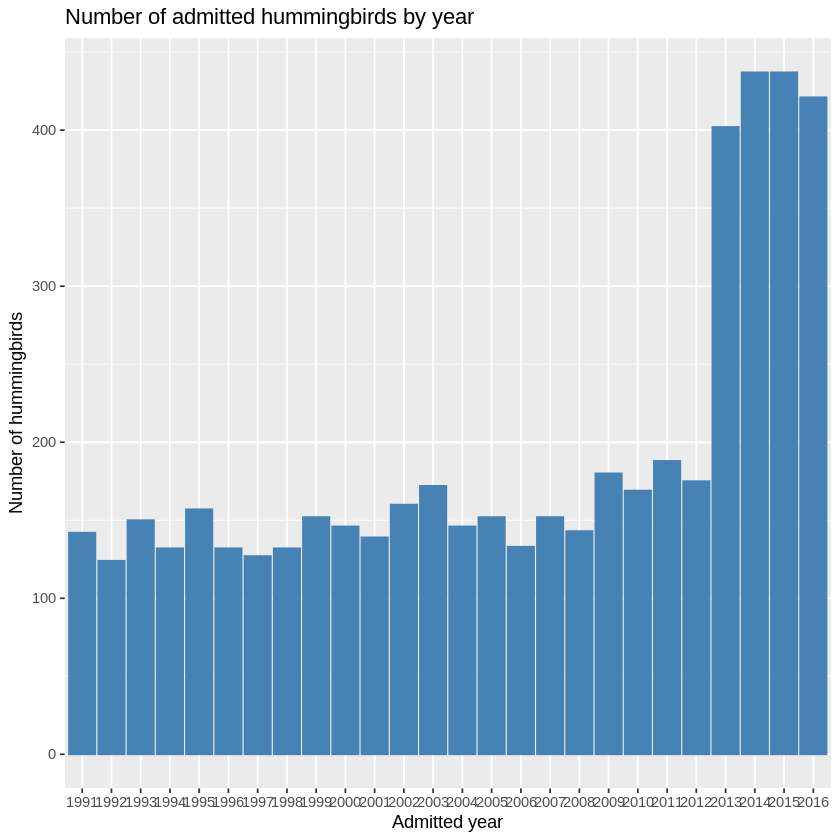

In [ ]:
admissions_by_year
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') +
  xlab('Admitted year') +
  ylab('Number of hummingbirds') +
  labs(title = "Number of admitted hummingbirds by year")
print(p_year)